# Task 2: Sentiment Analysis of IMDB Reviews
## Author: Muhammad Tayyab Iqbal
## Email: thetayyabiqbal@gmail.com
### Date: Jan 24, 2025

## Step 1: Importing all related libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Step 2: Importing Data Set

In [ ]:
df = pd.read_csv("IMDB Dataset.csv")
df.dropna(inplace=True)

## Step 3: Data Pre-processing

### Step 3(A): Showing head of dataset

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Step 3(B): Showing tail of dataset

In [ ]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


### Step 3(C): Check Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


### Step 3(D): Finding missing or null values

In [ ]:
df.isnull().sum()

,0
review,0
sentiment,0


### Step 3(E): Lower-casing the text, removing stopwords and special characters

In [ ]:
# Preprocess the text
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['review'] = df['review'].apply(preprocess_text)

### Step 3(F): Check the value count of "sentiment" column

In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


### Step 3(G): Replacing Values

In [ ]:
df['sentiment'].replace({"positive": 1, "negative": 0}, inplace=True)
df.head()

<ipython-input-12-f7d5948072a6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sentiment'].replace({"positive": 1, "negative": 0}, inplace=True)
<ipython-input-12-f7d5948072a6>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentiment'].replace({"positive": 1, "negative": 0}, inplace=True

,review,sentiment
0,one reviewers mentioned watching oz episode yo...,1
1,wonderful little production br br filming tech...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1


### Step 3(H): Check Dataset Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


## Step 4: Splitting the Data

In [ ]:
X = df['review']
y = df['sentiment']

## Step 5: Train the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 6: Transform the Data

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features= 5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Step 7: Invite and Train the Model

In [ ]:
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=200)

## Step 8: Evaluating the Model

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.89
Confusion Matrix:
[[4329  632]
 [ 487 4552]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



## Step 9: Plotting Confusion Matrix

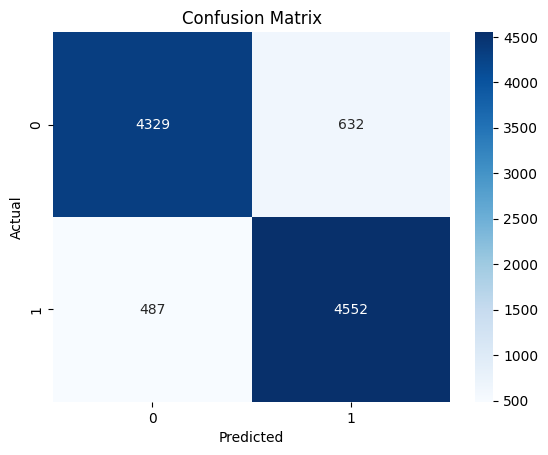

In [ ]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()